In [1]:
import os

import requests

url = "https://kshop-dev.oss-cn-beijing.aliyuncs.com/common/train.zip"
target_folder = "./data/train"

# 创建目标目录（如果不存在）
os.makedirs(target_folder, exist_ok=True)

# 下载zip文件
response = requests.get(url)
filename = os.path.join(target_folder, "train.zip")
with open(filename, "wb") as f:
    f.write(response.content)





In [4]:
import zipfile
import os

target_folder = "./data/train"

filename = os.path.join(target_folder, "train.zip")
# 解压zip文件并将图片文件保存到临时目录中
# 解压缩文件
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

In [5]:
import os, shutil

target_folder = "./data/train"

original_dataset_dir = os.path.join(target_folder, 'train')
base_dir = './data/cats_and_dogs_small/'

os.makedirs(base_dir, exist_ok=True)
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
print('total training cat images', len(os.listdir(train_cats_dir)))
print('total training dog images', len(os.listdir(train_dogs_dir)))
print('total validation cat images', len(os.listdir(validation_cats_dir)))
print('total validation dog images', len(os.listdir(validation_dogs_dir)))
print('total test cat images', len(os.listdir(test_cats_dir)))
print('total test dog images', len(os.listdir(test_dogs_dir)))

total training cat images 1000
total training dog images 1000
total validation cat images 500
total validation dog images 500
total test cat images 500
total test dog images 500


In [10]:
from tensorflow import optimizers
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2023-04-28 10:49:04.662415: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

/var/folders/2y/6zpyxsv91h5f6rkk2bhks16c0000gp/T/ipykernel_43071/4034251495.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
100/100 [==============================] - 27s 257ms/step - loss: 0.6962 - acc: 0.4955 - val_loss: 0.6846 - val_acc: 0.5990
Epoch 2/30
100/100 [==============================] - 27s 271ms/step - loss: 0.6658 - acc: 0.6095 - val_loss: 0.6500 - val_acc: 0.6150
Epoch 3/30
100/100 [==============================] - 26s 258ms/step - loss: 0.6114 - acc: 0.6720 - val_loss: 0.6461 - val_acc: 0.6160
Epoch 4/30
100/100 [==============================] - 29s 288ms/step - loss: 0.5669 - acc: 0.7145 - val_loss: 0.5924 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 29s 288ms/step - loss: 0.5361 - acc: 0.7300 - val_loss: 0.6072 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 28s 282ms/step - loss: 0.5056 - acc: 0.7485 - val_loss: 0.5766 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 27s 265ms/step - loss: 0.4721 - acc: 0.7660 - val_loss: 0.5817 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 2

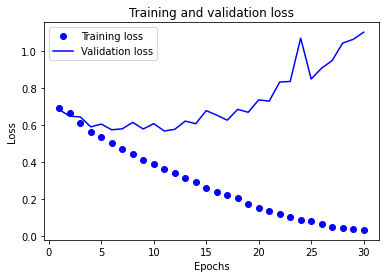

In [13]:
import matplotlib.pyplot as plt


def print_train_val_loss(history_dict):
    plt.clf()
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


print_train_val_loss(history.history)


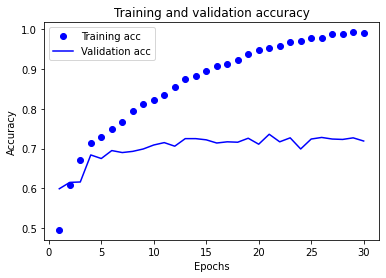

In [14]:
def print_train_val_acc(history_dict):
    plt.clf()
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    epochs = range(1, len(val_acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


print_train_val_acc(history.history)

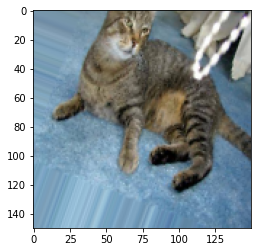

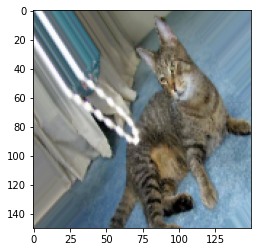

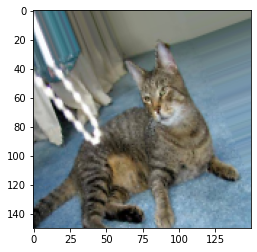

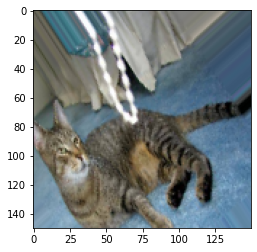

In [15]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# 选择一张图片
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
# 转为向量, 形状为(150, 150, 3)
x = image.img_to_array(img)
# 给单个数据增加一个批量的维度，形状改为(1,150,150,3)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i + 1
    if i % 4 == 0:
        break

plt.show()



In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])


In [17]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_2.h5')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/var/folders/2y/6zpyxsv91h5f6rkk2bhks16c0000gp/T/ipykernel_43071/587917649.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
100/100 [==============================] - 31s 301ms/step - loss: 0.6934 - acc: 0.5095 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6790 - acc: 0.5545 - val_loss: 0.6722 - val_acc: 0.5360
Epoch 3/100
100/100 [==============================] - 29s 286ms/step - loss: 0.6677 - acc: 0.5830 - val_loss: 0.6514 - val_acc: 0.5980
Epoch 4/100
100/100 [==============================] - 28s 282ms/step - loss: 0.6571 - acc: 0.6055 - val_loss: 0.6256 - val_acc: 0.6290
Epoch 5/100
100/100 [==============================] - 29s 286ms/step - loss: 0.6433 - acc: 0.6160 - val_loss: 0.6375 - val_acc: 0.6320
Epoch 6/100
100/100 [==============================] - 28s 281ms/step - loss: 0.6282 - acc: 0.6395 - val_loss: 0.6027 - val_acc: 0.6560
Epoch 7/100
100/100 [==============================] - 28s 277ms/step - loss: 0.6120 - acc: 0.6635 - val_loss: 0.5898 - val_acc: 0.6670
Epoch 8/100
100/100 [===========================

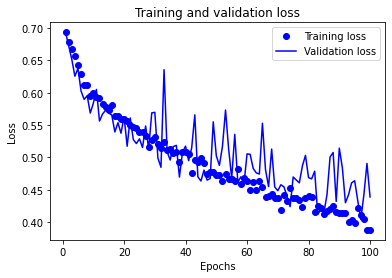

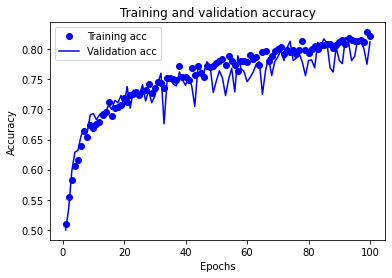

In [18]:
print_train_val_loss(history.history)
print_train_val_acc(history.history)
